# Analysing trends over Order_Date, Ship_Date, Ship_Mode and Sales

In [80]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Load Data

In [81]:
# 2. Load Dataset
df = pd.read_csv('C:\\Users\\Ricardo.Jordan\\Github\\Tech_Lab6\\17072024_sales_data\\Clean_Data.csv', encoding='latin1')


# 3. Understand Structure
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.head())
print(df.describe())
print(df.info())

(9789, 14)
Index(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Segment',
       'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales'],
      dtype='object')
Order_Date       object
Ship_Date        object
Ship_Mode        object
Customer_ID      object
Segment          object
City             object
State            object
Postal_Code     float64
Region           object
Product_ID       object
Category         object
Sub_Category     object
Product_Name     object
Sales           float64
dtype: object
   Order_Date   Ship_Date       Ship_Mode Customer_ID    Segment  \
0  2017-11-08  2017-11-11    Second Class    CG-12520   Consumer   
1  2017-11-08  2017-11-11    Second Class    CG-12520   Consumer   
2  2017-06-12  2017-06-16    Second Class    DV-13045  Corporate   
3  2016-10-11  2016-10-18  Standard Class    SO-20335   Consumer   
4  2016-10-11  2016-10-18  Standard Class    SO-20335   Consumer   

           

# Data Cleaning

In [82]:
df = pd.read_csv('C:\\Users\\Ricardo.Jordan\\Github\\Tech_Lab6\\17072024_sales_data\\Clean_Data.csv', encoding='latin1')



categorical_columns = ['Ship_Mode', 'Segment',  'City', 'State', 'Region', 'Category', 'Sub_Category', 'Product_ID' ]
for col in categorical_columns:
    df[col] = df[col].astype('category')

numerical_columns = ['Postal_Code', 'Sales']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

if 'Order_Date' in df.columns and 'Ship_Date' in df.columns:
    # Convertir las columnas de fecha al tipo datetime
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
    df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])


# Check for missing values
missing_values = df.isnull().sum()

# 3. Data Consistency
# Check for duplicates
df.drop_duplicates(inplace=True)

print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
Index: 9788 entries, 0 to 9788
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_Date    9788 non-null   datetime64[ns]
 1   Ship_Date     9788 non-null   datetime64[ns]
 2   Ship_Mode     9788 non-null   category      
 3   Customer_ID   9788 non-null   object        
 4   Segment       9788 non-null   category      
 5   City          9788 non-null   category      
 6   State         9788 non-null   category      
 7   Postal_Code   9788 non-null   float64       
 8   Region        9788 non-null   category      
 9   Product_ID    9788 non-null   category      
 10  Category      9788 non-null   category      
 11  Sub_Category  9788 non-null   category      
 12  Product_Name  9788 non-null   object        
 13  Sales         9788 non-null   float64       
dtypes: category(8), datetime64[ns](2), float64(2), object(2)
memory usage: 733.0+ KB
None
  Order

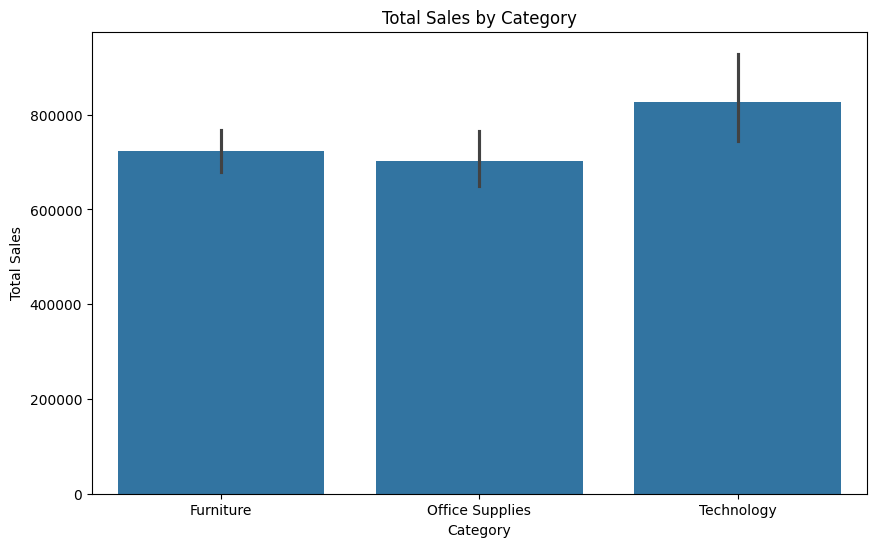

In [77]:
#Exploratory Data Analysis (EDA)
# Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()




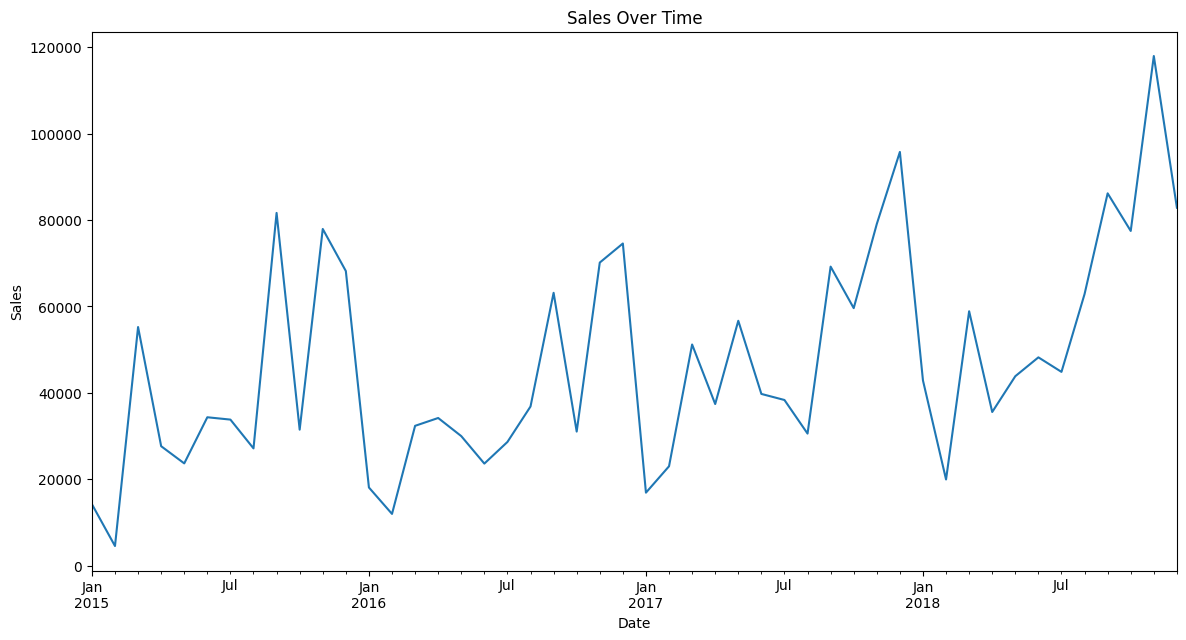

In [83]:
# Time series analysis of Sales
df.set_index('Order_Date', inplace=True)

sales_over_time = df['Sales'].resample('M').sum()
plt.figure(figsize=(14, 7))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [84]:


# Time series analysis of Sales


print(df.head())

df.set_index('Order_Date', inplace=True)
sales_over_time = df['Sales'].resample('M').sum()
plt.figure(figsize=(14, 7))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



            Ship_Date       Ship_Mode Customer_ID    Segment             City  \
Order_Date                                                                      
2017-11-08 2017-11-11    Second Class    CG-12520   Consumer        Henderson   
2017-11-08 2017-11-11    Second Class    CG-12520   Consumer        Henderson   
2017-06-12 2017-06-16    Second Class    DV-13045  Corporate      Los Angeles   
2016-10-11 2016-10-18  Standard Class    SO-20335   Consumer  Fort Lauderdale   
2016-10-11 2016-10-18  Standard Class    SO-20335   Consumer  Fort Lauderdale   

                 State  Postal_Code Region       Product_ID         Category  \
Order_Date                                                                     
2017-11-08    Kentucky      42420.0  South  FUR-BO-10001798        Furniture   
2017-11-08    Kentucky      42420.0  South  FUR-CH-10000454        Furniture   
2017-06-12  California      90036.0   West  OFF-LA-10000240  Office Supplies   
2016-10-11     Florida      3331

KeyError: "None of ['Order_Date'] are in the columns"

In [29]:
# Calculate the difference in days between Ship_Date and Order_Date
# Delays per Year - Has it gotten better? Plot it 
# How long do the different segments take per year as well any substancial difference?

if (df['Ship_Date'].dt.year == 2017).all():  # Verifica si todos los años son 2017
    df['Difference'] = (df['Ship_Date'] - df['Order_Date']).dt.days


average_shipping_duration = df.mean()
print(average_shipping_duration)


TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [135]:


# Set 'Order_Date' as index and resample
df_order = df.set_index('Order_Date')
sales_order_time = df_order['Sales'].resample('M').sum()

# Set 'Ship_Date' as index and resample
df_ship = df.set_index('Ship_Date')
sales_ship_time = df_ship['Sales'].resample('M').sum()

# Plotting the sales over time
plt.figure(figsize=(14, 7))
plt.plot(sales_order_time, label='Sales by Order Date', marker='o')
plt.plot(sales_ship_time, label='Sales by Ship Date', marker='s')

# Add title and labels
plt.title('Sales Over Time by Order Date and Ship Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Annotate months and yearly sales increase
for i, (date, sales) in enumerate(sales_order_time.items()):
    if date.month == 1:  # Annotate January for Order Date
        plt.annotate(f'{date.strftime("%b")}\n{date.year}', xy=(date, sales), xytext=(date, sales + 20),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     horizontalalignment='center')

for i, (date, sales) in enumerate(sales_ship_time.items()):
    if date.month == 1:  # Annotate January for Ship Date
        plt.annotate(f'{date.strftime("%b")}\n{date.year}', xy=(date, sales), xytext=(date, sales + 20),
                     arrowprops=dict(facecolor='blue', arrowstyle='->'),
                     horizontalalignment='center', color='blue')

plt.show()

KeyError: "None of ['Order_Date'] are in the columns"

# Plotly Express - Scatter_mapbox